Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

******

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2hsv, hsv2rgb
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'
warnings.filterwarnings('ignore')

In [2]:
img = imageio.imread('65140.jpg') / 255
img.shape

(695, 1020, 3)

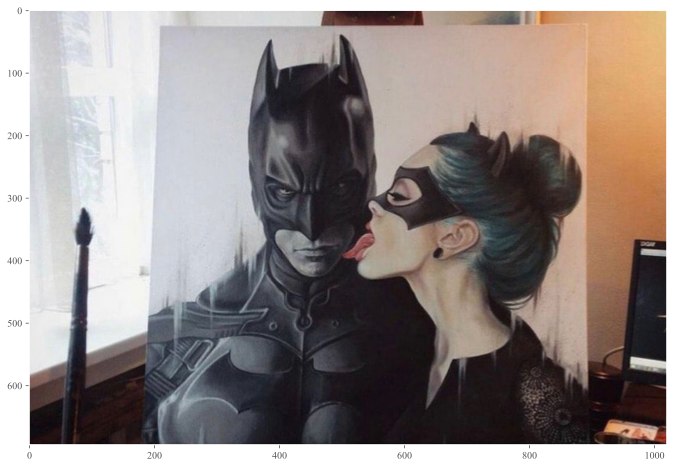

In [3]:
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.grid()
plt.show()

In [4]:
class ImagePreprocessingTest:

    def __init__(self, image: np.array, result_show=True):
        self.image = image
        self.result_show = result_show

    def result_plot(self):
        plt.figure(figsize=(13, 9))
        plt.subplot(1, 2, 1)
        plt.imshow(self.image)
        plt.title('ORIGINAL')
        plt.grid()
        plt.subplot(1, 2, 2)
        plt.imshow(self.img2)
        plt.title('TRANSFORMED')
        plt.grid()
        plt.subplots_adjust(wspace=0.1, hspace=0)
        plt.show()

    def brightness_variations(self, k):  # нелинейное измениение ярокости

        self.img2 = self.image.copy()**abs(k)
        if self.result_show:
            self.result_plot()

    def window_filter(self, window):  # оконный фильтр

        w_shape = window.shape[0]
        img2 = []

        if window.shape[0] == window.shape[1]:

            for c in range(3):
                out_img_layer = np.zeros(
                    (self.image.shape[0] - w_shape + 1, self.image.shape[1] - w_shape + 1), dtype=np.float32)
                img = self.image[:, :, c].copy()
                for i in range(out_img_layer.shape[0]):
                    for j in range(out_img_layer.shape[1]):
                        x = img[i:i+w_shape, j:j+w_shape]
                        out_img_layer[i, j] = np.sum(window * x)
                img2.append(out_img_layer)
            self.img2 = np.stack(img2, axis=2)

            if self.result_show:
                self.result_plot()

    def hsv_processing(self, h=None, s=None, v=None):

        img2 = rgb2hsv(self.image)

        if h:  # тон
            img2[:, :, 0] /= h
        if s:  # насыщенность
            img2[:, :, 1] /= s
        if v:  # яркость
            img2[:, :, 2] /= v

        self.img2 = hsv2rgb(img2)
        if self.result_show:
            self.result_plot()

In [5]:
img_preprocessing = ImagePreprocessingTest(img)

## Изменение яркости

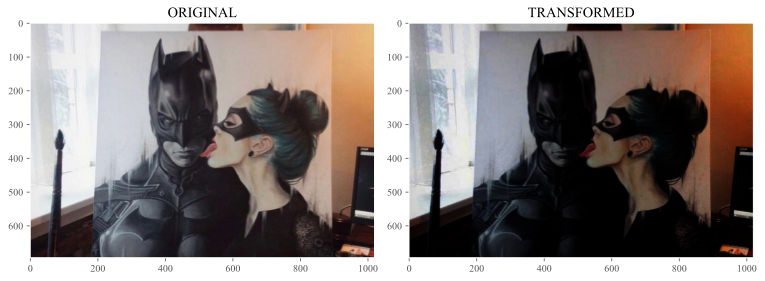

In [6]:
img_preprocessing.brightness_variations(2.5)

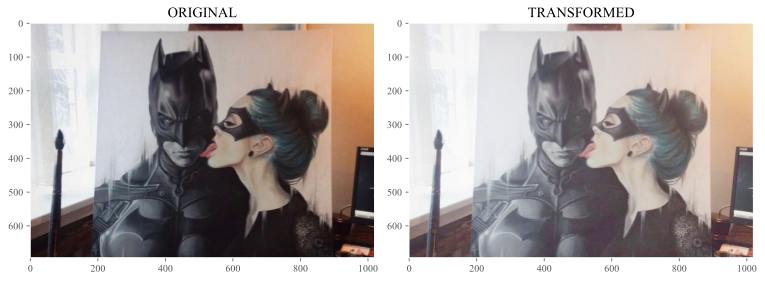

In [7]:
img_preprocessing.brightness_variations(0.5)

## BLUR размытие

In [8]:
# BLUR
win_size = (11, 11)
window = np.ones(win_size, dtype=np.float32)
window = window / np.sum(window)

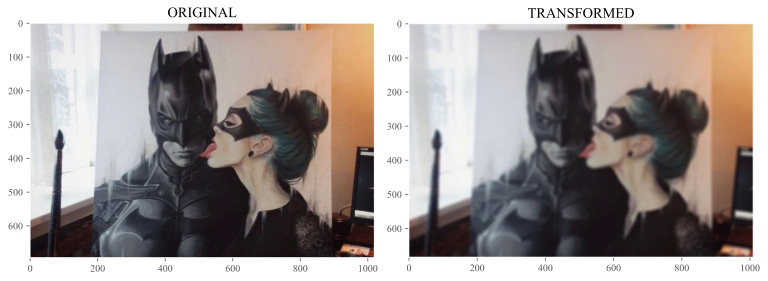

In [9]:
img_preprocessing.window_filter(window)

## GAUSS размытие

In [10]:
# GAUSS
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i, j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2
                         - (j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

In [ ]:
img_preprocessing.window_filter(w)

## HSV обработка

In [ ]:
img_preprocessing.hsv_processing(h=22.75, s=1.95)